In [15]:
import tushare as ts
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.pyplot as plt 

In [18]:
import seaborn as sns
sns.set(style='ticks', palette='Set2')

In [36]:
import ffn

In [3]:
pro = ts.pro_api()

In [5]:
st = pro.stock_basic()

In [7]:
st.market.value_counts()

主板     2014
中小板     978
创业板     869
科创板     190
Name: market, dtype: int64

In [9]:
st[st.name.str.contains('华大')]

,ts_code,symbol,name,area,industry,market,list_date
2092,300676.SZ,300676,华大基因,深圳,医疗保健,创业板,20170714


In [22]:
df = pro.daily(ts_code='300676.SZ', start_date='20161101', end_date='20201101')
df.trade_date = pd.to_datetime(df.trade_date)

In [23]:
df = df.set_index('trade_date').sort_index()

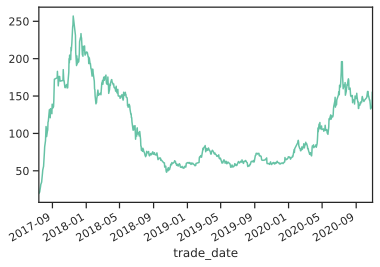

In [24]:
df.close.plot()

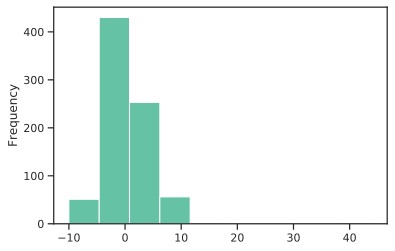

In [26]:
df.pct_chg.plot.hist()

In [27]:
df.head(2)

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2017-07-14,300676.SZ,16.37,19.64,16.37,19.64,13.64,6.00,43.99,55.00,106.878
2017-07-17,300676.SZ,21.60,21.60,21.60,21.60,19.64,1.96,9.98,53.47,115.495


In [32]:
news = pro.cctv_news(date='20201101')

In [41]:
ffn.to_returns(df.close).head(3)

trade_date
2017-07-14         NaN
2017-07-17    0.099796
2017-07-18    0.100000
Name: close, dtype: float64

In [46]:
def qq_plot(X):
    import statsmodels.api as sm
    from scipy import stats
    g = sm.qqplot(X, stats.norm, fit=True, line='45')

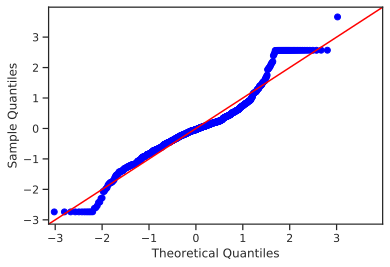

In [48]:
qq_plot(ffn.to_returns(df.close).dropna())

In [49]:
df

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2017-07-14,300676.SZ,16.37,19.64,16.37,19.64,13.64,6.00,43.9900,55.00,106.878
2017-07-17,300676.SZ,21.60,21.60,21.60,21.60,19.64,1.96,9.9800,53.47,115.495
2017-07-18,300676.SZ,23.76,23.76,23.76,23.76,21.60,2.16,10.0000,23.22,55.170
2017-07-19,300676.SZ,26.14,26.14,26.14,26.14,23.76,2.38,10.0200,53.14,138.907
2017-07-20,300676.SZ,28.75,28.75,28.75,28.75,26.14,2.61,9.9800,82.00,235.750
...,...,...,...,...,...,...,...,...,...,...
2020-10-26,300676.SZ,131.99,137.20,131.00,134.57,132.83,1.74,1.3099,33044.36,443953.096
2020-10-27,300676.SZ,135.20,136.78,132.89,135.47,134.57,0.90,0.6688,29619.97,399859.388
2020-10-28,300676.SZ,140.81,140.81,133.00,136.03,135.47,0.56,0.4134,53798.02,731273.797


In [50]:
k = df[df.index >= '2020-08-01'].copy()

In [56]:
log_return = ffn.to_log_returns(k[['close', 'vol', 'amount']]).dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9d04d6080>,
      dtype=object)

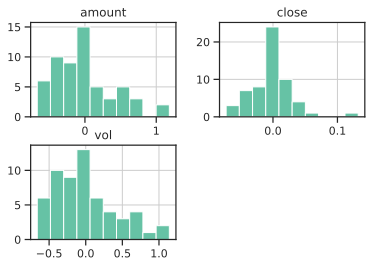

In [57]:
log_return.hist()

<module 'matplotlib.pyplot' from '/home/latila/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

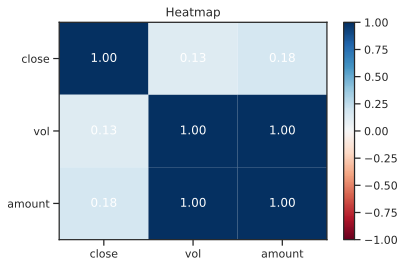

In [58]:
log_return.plot_corr_heatmap()

In [60]:
perf = ffn.calc_stats(k['close'])

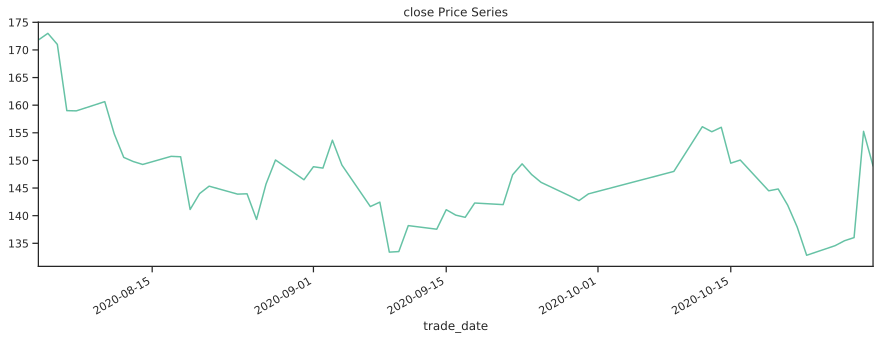

In [62]:
perf.plot()

In [64]:
def calc_half_dev(returns):
    mu = returns.mean()
    hreturns = returns[returns < mu]
    return (((mu-hreturns)**2).sum()/hreturns.shape[0]) ** 0.5

In [66]:
calc_half_dev(ffn.to_returns(k.close).dropna())

0.030299599263371488

In [68]:
rt = ffn.to_returns(k.close).dropna()

In [70]:
rt.quantile(0.05)

-0.05234864698163758

In [72]:
(rt.mean() + rt.quantile(0.05)) * 100

-5.428233706270413

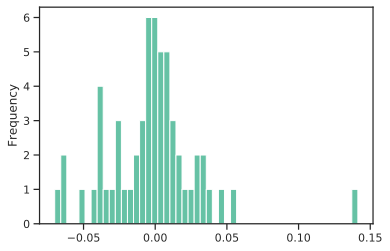

In [78]:
rt.plot.hist(bins=50)

In [80]:
#当样本在50到300之间时使用lilliefors
from statsmodels.stats.diagnostic import lilliefors
lilliefors(rt)

(0.11277387603225653, 0.0777613715076692)

In [79]:
#当样本大于300时 使用kstest
# 注意kstest仅仅适用于连续分布
from scipy.stats import kstest
kstest(X, 'norm')

KstestResult(statistic=0.4720502842711562, pvalue=2.207394846579852e-12)

In [107]:
ffn.calc_max_drawdown(kk)

-0.1371676300578034

In [98]:
kk = k.iloc[:10]['close']

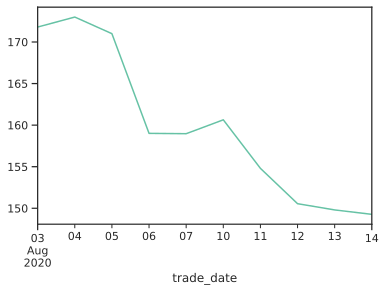

In [99]:
kk.plot()

In [100]:
r = ffn.to_returns(kk).dropna()

In [105]:
r

trade_date
2020-08-04    0.006985
2020-08-05   -0.011561
2020-08-06   -0.070117
2020-08-07   -0.000252
2020-08-10    0.010505
2020-08-11   -0.036355
2020-08-12   -0.027455
2020-08-13   -0.004982
2020-08-14   -0.003538
Name: close, dtype: float64

In [103]:
value = (1+r).cumprod()

In [106]:
value

trade_date
2020-08-04    1.006985
2020-08-05    0.995343
2020-08-06    0.925553
2020-08-07    0.925320
2020-08-10    0.935041
2020-08-11    0.901048
2020-08-12    0.876310
2020-08-13    0.871944
2020-08-14    0.868859
Name: close, dtype: float64

In [104]:
value.cummax() - value

trade_date
2020-08-04    0.000000
2020-08-05    0.011641
2020-08-06    0.081432
2020-08-07    0.081665
2020-08-10    0.071944
2020-08-11    0.105937
2020-08-12    0.130675
2020-08-13    0.135041
2020-08-14    0.138126
Name: close, dtype: float64